In [31]:
## imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [32]:
## loading testing and training dataframes
train_df = pd.read_csv('../data/complete_train_df')
test_df = pd.read_csv('../data/complete_test_df')

In [33]:
## set Id column to be our new index for both train and test set
train_df.set_index("Id", inplace=True)
test_df.set_index("Id", inplace=True)

In [34]:
train_df.head()

,overall_qual,year_built,year_remod/add,mas_vnr_area,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,totrms_abvgrd,garage_yr_blt,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,
109,6,1976,2005,289.0,725.0,725,1479,2,6,1976.0,...,0,0,0,0,1,0,0,0,0,0
544,7,1996,1997,132.0,913.0,913,2122,2,8,1997.0,...,0,0,0,0,0,1,0,0,0,0
153,5,1953,2007,0.0,1057.0,1057,1057,1,5,1953.0,...,0,0,0,0,0,0,0,0,0,0
318,5,2006,2007,0.0,384.0,744,1444,2,7,2007.0,...,0,0,0,0,0,0,0,0,1,0
255,6,1900,1993,0.0,676.0,831,1445,2,6,1957.0,...,0,0,0,0,0,1,0,0,0,0


### First Model: Linear Regression

In [35]:
X = train_df.drop(columns=['saleprice'])
y = train_df['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [36]:
## scaling the data for LASSO and Ridge models
sc = StandardScaler()

Z_train = sc.fit_transform(X_train)
Z_test = sc.fit_transform(X_test)

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
print(f'Training score: {lr.score(X_train, y_train)}')

Training score: 0.8944497772720001


In [39]:
print(f'Testing score: {lr.score(X_test, y_test)}')

Testing score: 0.8708246410848882


In [40]:
## predictions for training and testing data split from training DF
train_preds = lr.predict(X_train)
test_preds  = lr.predict(X_test)

In [41]:
## calculating RMSE for training and testing data split from training DF
print(f'RMSE for training: {mean_squared_error(y_train, train_preds, squared=False)}')

RMSE for training: 25769.352294477056


In [42]:
print(f'RMSE for testing: {mean_squared_error(y_test, test_preds, squared=False)}')

RMSE for testing: 28446.30150157733


In [43]:
cross_val_score(lr, X,y).mean()

0.8802121255490404

In [44]:
lr.coef_

array([ 1.06518975e+04,  2.78840220e+02,  2.44224582e+02,  3.14152506e+01,
        2.87986307e+01,  3.23719665e+00,  5.52848546e+01, -9.64200557e+03,
       -8.62595463e+02, -4.17226408e+01,  3.01702866e+03,  3.45549043e+01,
       -3.31549182e+04, -3.30281263e+04, -3.71965128e+04, -4.14933907e+04,
       -3.69702535e+04, -3.95137114e+04, -2.40738770e+04, -6.39101732e+03,
       -4.39743522e+04, -1.54372636e+04,  1.87657248e+04, -3.20673634e+04,
       -7.08899193e+03, -1.06179494e+03,  6.91241809e+03,  2.72068382e+04,
        1.69048225e+04, -1.20462128e+04,  1.01055542e+04, -4.89181780e+03,
       -1.05094044e+04, -1.54497920e+04, -3.01409510e+04, -7.60565610e+02,
        1.74450115e+04,  5.33583446e+02,  1.65609263e+04, -6.19765005e+02,
        5.34809429e+03,  3.17488743e+03, -4.01273817e+03, -1.36519400e+04,
        2.80842599e+03, -2.32387599e+03, -6.88004644e+03, -8.63573006e+03,
        2.76159861e+04,  1.91197937e+04, -1.25820292e+04, -3.41599080e+03,
        4.96568986e+03, -

In [45]:
## creating coeff dataframe

lr_coef = pd.DataFrame({
    "column_name": X.columns,
    "coef": lr.coef_,
    "abs_coef": abs(lr.coef_)
})

lr_coef

,column_name,coef,abs_coef
0,overall_qual,10651.897493,10651.897493
1,year_built,278.840220,278.840220
2,year_remod/add,244.224582,244.224582
3,mas_vnr_area,31.415251,31.415251
4,total_bsmt_sf,28.798631,28.798631
5,1st_flr_sf,3.237197,3.237197
6,gr_liv_area,55.284855,55.284855
7,full_bath,-9642.005569,9642.005569
8,totrms_abvgrd,-862.595463,862.595463
9,garage_yr_blt,-41.722641,41.722641


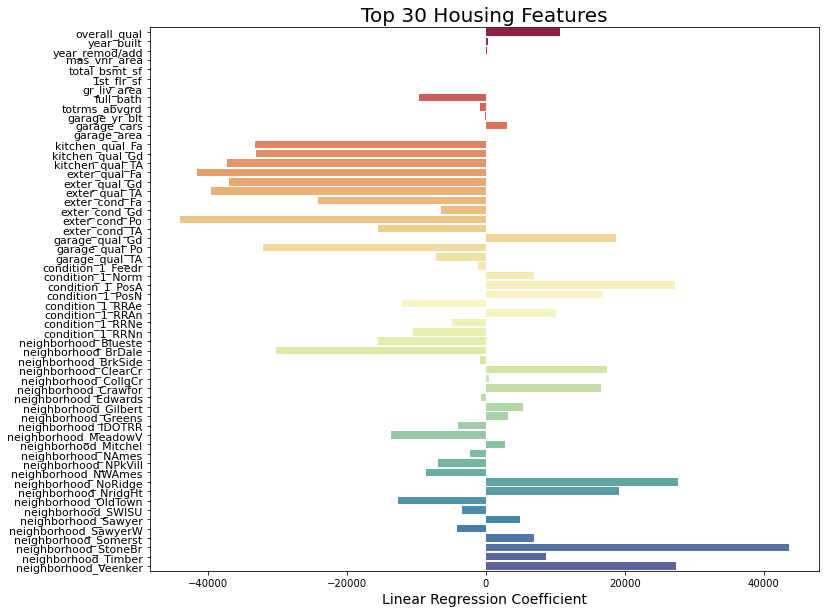

In [46]:
# Plot top 30 features (sorted by absolute regression coefficient)
plt.figure(figsize=(12,10))
data = lr_coef.sort_values(by='abs_coef', ascending=False).head(30)[['column_name', 'coef']] \
               .sort_values(by='coef', ascending=False).reset_index(drop=True)
    
ax = sns.barplot(data=lr_coef, y='column_name', x='coef', orient='h', palette='Spectral')
ax.set_ylabel('')
ax.set_yticklabels(lr_coef['column_name'], size=11)
ax.set_xlabel('Linear Regression Coefficient', fontsize=14)
plt.title('Top 30 Housing Features', fontsize=20);

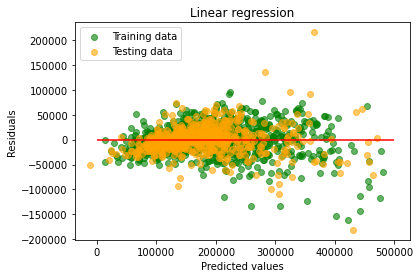

In [47]:
## plotting residuals: y- y_hat
plt.scatter(train_preds, train_preds - y_train, c = "green", marker = "o", label = "Training data", alpha=0.6)
plt.scatter(test_preds, test_preds - y_test, c = "orange", marker = "o", label = "Testing data", alpha=0.6)
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 500_000, color = "red");

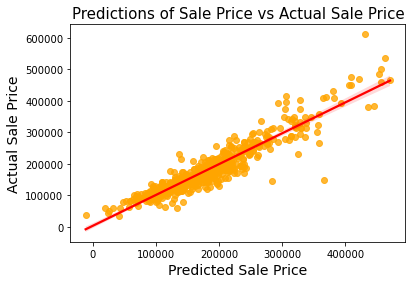

In [48]:
## plotting predicted values vs actual values

sns.regplot(data=X_train, x=test_preds, y=y_test, marker='o', color='orange', line_kws={'color':'red'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=15);

### Ridge Model

In [49]:
## creat a list of alphas to check 
ridge_alpha = np.logspace(0,3,100)

## cross validate over our list of alphas
ridge_cv = RidgeCV(alphas = ridge_alpha, scoring = 'r2', cv =5)

## fit model using best ridge alpha
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([   1.        ,    1.07226722,    1.149757  ,    1.23284674,
          1.32194115,    1.41747416,    1.51991108,    1.62975083,
          1.7475284 ,    1.87381742,    2.009233  ,    2.15443469,
          2.3101297 ,    2.47707636,    2.65608778,    2.84803587,
          3.05385551,    3.27454916,    3.51119173,    3.76493581,
          4.03701726,    4.32876128,    4.64158883,    4.97702356,
          5.33669923,    5.72236766,    6.13590727,    6.57933225,
          7.05480231,    7.56463328,    8.11130831,    8...
        151.9911083 ,  162.97508346,  174.75284   ,  187.38174229,
        200.92330026,  215.443469  ,  231.01297001,  247.7076356 ,
        265.60877829,  284.80358684,  305.38555088,  327.45491629,
        351.11917342,  376.49358068,  403.70172586,  432.87612811,
        464.15888336,  497.70235643,  533.66992312,  572.23676594,
        613.59072734,  657.93322466,  705.48023107,  756.46332755,
        811.13083079,  869.74900262,  932.60334688, 10

In [50]:
## checking for the optimal alpha value
ridge_cv.alpha_

20.09233002565047

In [51]:
##checking r2 scores for training
ridge_cv.score(Z_train, y_train)

0.8940171078042014

In [52]:
##checking r2 scores for testing
ridge_cv.score(Z_test, y_test)

0.8660827715571303

In [53]:
ridge_cv.best_score_

0.8803998215578405

In [54]:
z_preds_test = ridge_cv.predict(Z_test)
z_preds_train = ridge_cv.predict(Z_train)

In [55]:
print(f'RMSE for training: {mean_squared_error(y_train, z_preds_train, squared=False)}')

RMSE for training: 25822.11489859323


In [56]:
print(f'RMSE for testing: {mean_squared_error(y_test, z_preds_test, squared=False)}')

RMSE for testing: 28963.710412459735


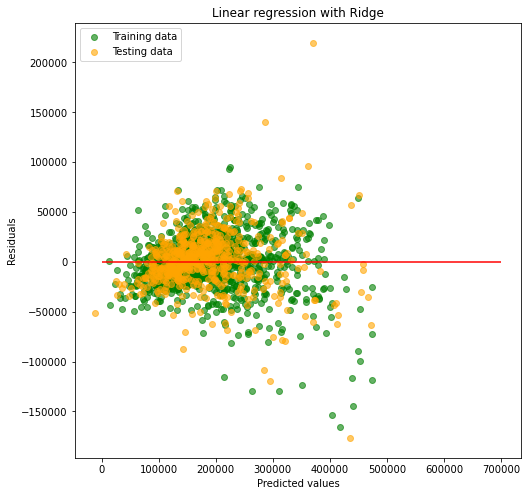

In [57]:
## plotting residuals: y- y_hat
plt.figure(figsize=(8,8))
plt.scatter(z_preds_train, z_preds_train - y_train, c = "green", marker = "o", label = "Training data", alpha=0.6)
plt.scatter(z_preds_test, z_preds_test - y_test, c = "orange", marker = "o", label = "Testing data", alpha=0.6)
plt.title("Linear regression with Ridge")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 700_000,color = "red");

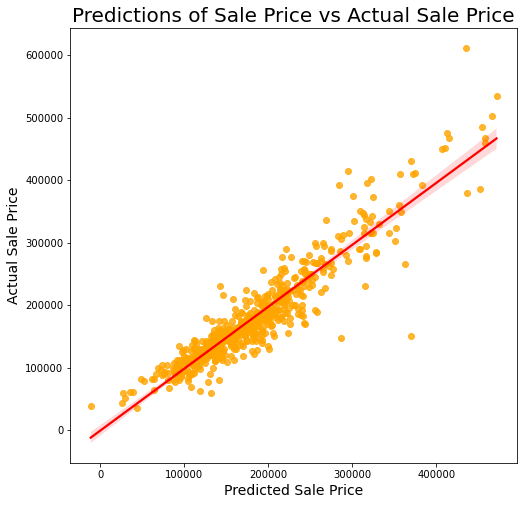

In [58]:
## plotting predicted values vs actual values

plt.figure(figsize=(8,8))
sns.regplot(data=X, x=z_preds_test, y=y_test, marker='o', color='orange', line_kws={'color':'red'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=20);

### LASSO Model

In [59]:
lasso_alphas = np.logspace(-3,0,100)
lasso_cv = LassoCV(alphas= lasso_alphas, cv =5, max_iter = 10_000_000, tol = 0.000000000001)

lasso_cv.fit(Z_train,y_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5, max_iter=10000000, tol=1e-12)

In [60]:
lasso_cv.alpha_

1.0

In [61]:
lasso_cv.score(Z_train, y_train)

0.894449734047685

In [62]:
lasso_cv.score(Z_test, y_test)

0.8674645943049425

In [63]:
z_preds_test = lasso_cv.predict(Z_test)
z_preds_train = lasso_cv.predict(Z_train)

In [64]:
print(f'RMSE for training: {mean_squared_error(y_train, z_preds_train, squared=False)}')

RMSE for training: 25769.357570934375


In [65]:
print(f'RMSE for testing: {mean_squared_error(y_test, z_preds_test, squared=False)}')

RMSE for testing: 28813.892148131556


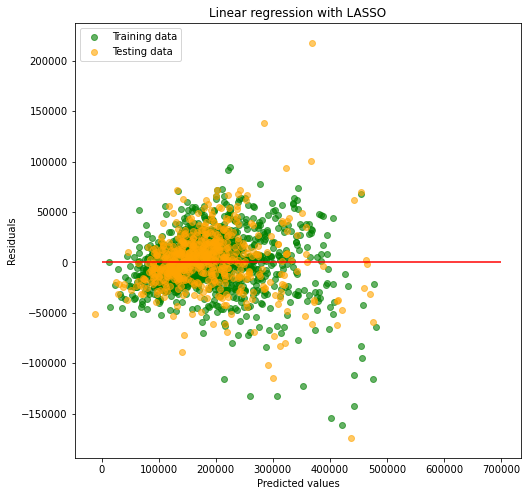

In [66]:
## plotting residuals: y- y_hat
plt.figure(figsize=(8,8))
plt.scatter(z_preds_train, z_preds_train - y_train, c = "green", marker = "o", label = "Training data", alpha=0.6)
plt.scatter(z_preds_test, z_preds_test - y_test, c = "orange", marker = "o", label = "Testing data", alpha=0.6)
plt.title("Linear regression with LASSO")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 700_000,color = "red");

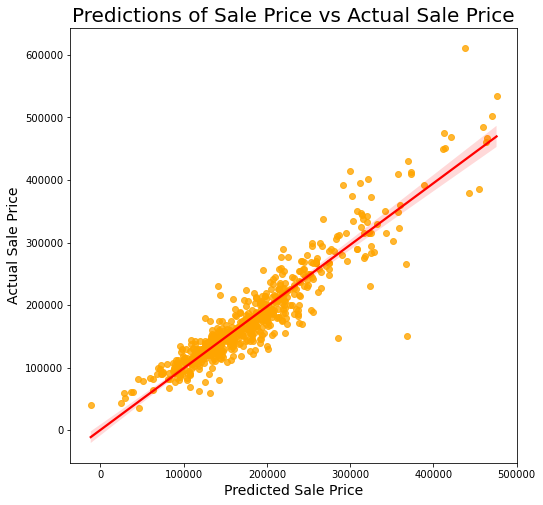

In [67]:
## plotting predicted values vs actual values

plt.figure(figsize=(8,8))
sns.regplot(data=X, x=z_preds_test, y=y_test, marker='o', color='orange', line_kws={'color':'red'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Predictions of Sale Price vs Actual Sale Price', fontsize=20);

### Baseline model

In [68]:
## baseline predictions
baseline_train_preds = [y_train.mean()]*len(y_train)
baseline_test_preds  = [y_train.mean()]*len(y_test)

In [69]:
y_train_baseline = [y_train.mean()] *len(y_train)
print(f'Baseline RMSE Train: {mean_squared_error(y_train, y_train_baseline, squared=False)}')

Baseline RMSE Train: 79318.39647261941


In [70]:
y_test_baseline = [y_train.mean()]*len(y_test)
print(f'Baseline RMSE Test: {mean_squared_error(y_test, y_test_baseline, squared=False)}')

Baseline RMSE Test: 79176.69714755214
